# Importing librarys

In [1]:
# importing librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

## Download the data

In [ ]:
tm_long_data = yf.download("TM", period="max", interval="1d")

[*********************100%***********************]  1 of 1 completed


In [ ]:
tm_long_data.head()

Price,Close,High,Low,Open,Volume
Ticker,TM,TM,TM,TM,TM
Date,,,,,
1980-03-17,2.296798,2.334144,2.296798,0.000000,41109
1980-03-18,2.306134,2.343480,2.306134,0.000000,9343
1980-03-19,2.306134,2.306134,2.306134,2.306134,0
1980-03-20,2.306134,2.343480,2.306134,0.000000,10277
1980-03-21,2.362153,2.399499,2.362153,0.000000,8409


In [ ]:
# rename the columns
tm_long_data.columns = ["Close", "High", "Low", "Open", "Volume"]

In [ ]:
tm_long_data.tail()

,Close,High,Low,Open,Volume
Date,,,,,
2025-01-23,186.270004,186.699997,185.050003,186.009995,237700
2025-01-24,186.610001,187.460007,185.399994,185.979996,278900
2025-01-27,186.500000,187.059998,185.820007,186.800003,308100
2025-01-28,185.289993,186.399994,184.149994,186.149994,382600
2025-01-29,186.979996,188.039993,186.479996,187.619995,256800


In [ ]:
# download the data
tm_long_data.to_csv("tm_long_data.csv")

## Load the data

In [2]:
tm_long_data = pd.read_csv("tm_long_data.csv")

# Exploratory Analysis

In [3]:
tm_long_data.head()

,Date,Close,High,Low,Open,Volume
0,1980-03-17,2.296798,2.334144,2.296798,0.000000,41109
1,1980-03-18,2.306134,2.343480,2.306134,0.000000,9343
2,1980-03-19,2.306134,2.306134,2.306134,2.306134,0
3,1980-03-20,2.306134,2.343480,2.306134,0.000000,10277
4,1980-03-21,2.362153,2.399499,2.362153,0.000000,8409


In [5]:
tm_long_data.shape

(11311, 6)

## Univariate Analysis

In [6]:
tm_long_data.describe()

,Close,High,Low,Open,Volume
count,11311.000000,11311.000000,11311.000000,11311.000000,1.131100e+04
mean,63.806177,64.174109,63.440347,60.951187,2.150096e+05
std,52.487063,52.753517,52.176058,55.411318,3.872082e+05
min,2.259452,2.259452,2.259452,0.000000,0.000000e+00
25%,19.224644,19.392848,19.224644,0.000000,1.350000e+04
50%,50.705498,51.087479,50.341033,50.842663,9.180000e+04
75%,104.952908,105.454649,104.475276,105.004869,2.930000e+05
max,254.770004,255.229996,253.589996,255.000000,1.858270e+07


In [7]:
tm_long_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11311 entries, 0 to 11310
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    11311 non-null  object 
 1   Close   11311 non-null  float64
 2   High    11311 non-null  float64
 3   Low     11311 non-null  float64
 4   Open    11311 non-null  float64
 5   Volume  11311 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 530.3+ KB


In [8]:
# change the Date data type
tm_long_data['Date'] = pd.to_datetime(tm_long_data['Date'])

In [9]:
# check for the missing values
tm_long_data.isnull().sum()

,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [10]:
# skewness and kurtosis
print("Skewness:", tm_long_data.select_dtypes(include=np.number).skew())
print("Kurtosis:", tm_long_data.select_dtypes(include=np.number).kurtosis())

Skewness: Close      0.852581
High       0.852450
Low        0.853852
Open       0.718607
Volume    14.500139
dtype: float64
Kurtosis: Close      -0.019000
High       -0.018397
Low        -0.019711
Open       -0.243228
Volume    530.380756
dtype: float64


## Distribution Analysis

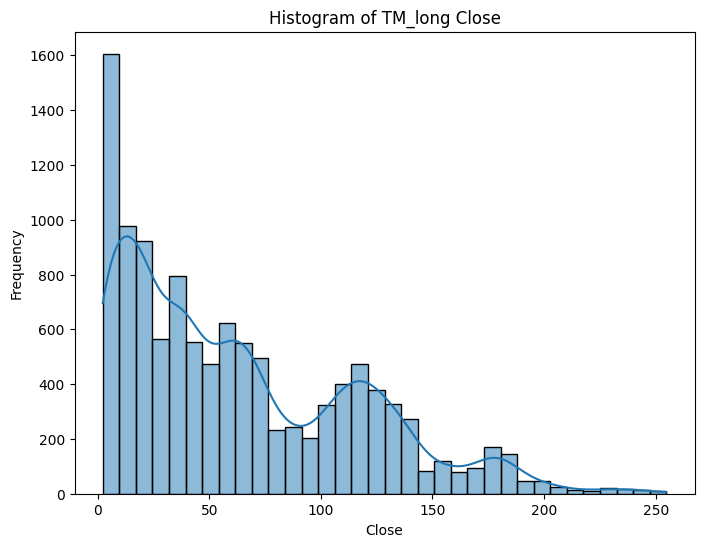

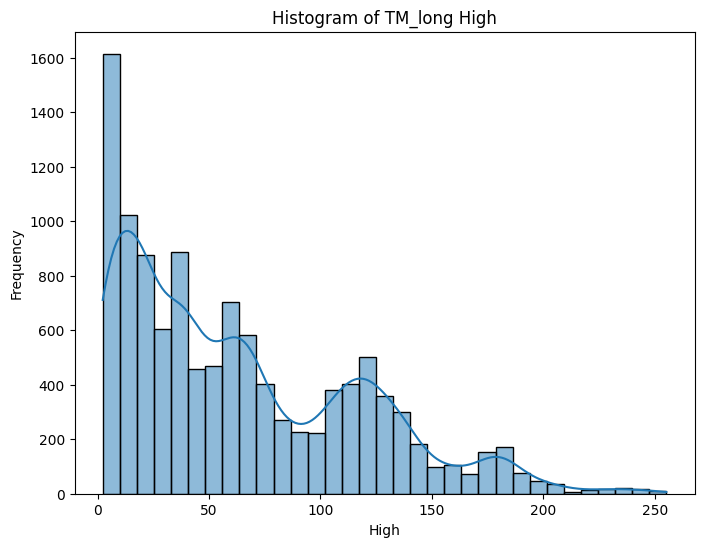

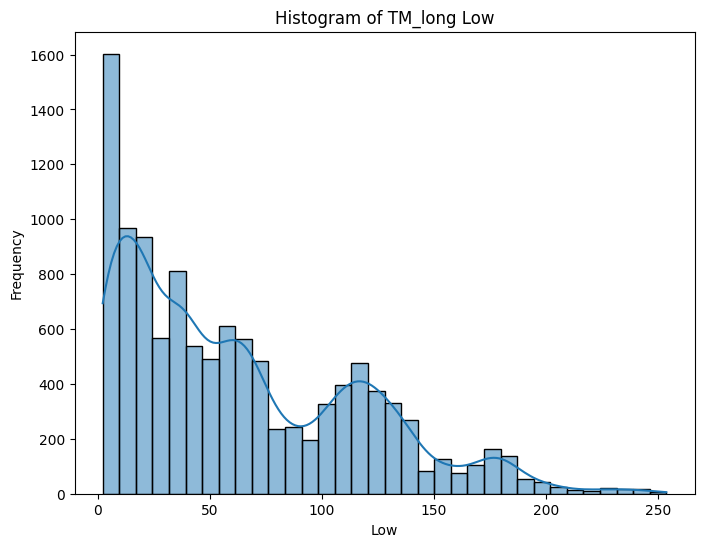

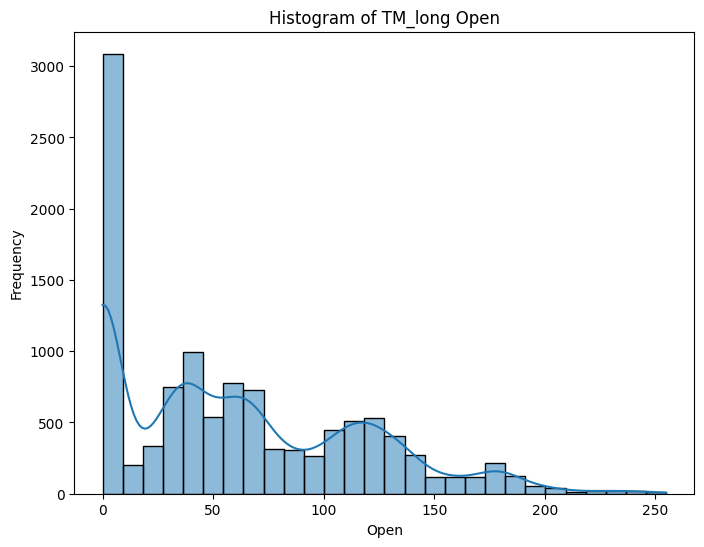

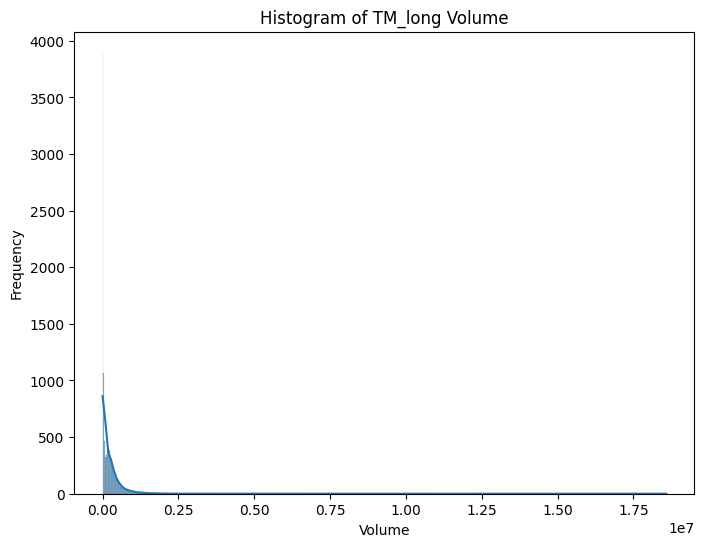

In [12]:
# Identify numerical columns
numerical_columns = tm_long_data.select_dtypes(include=[np.number]).columns

# Perform univariate analysis on numerical columns
for column in numerical_columns:
    # For continuous variables
    if len(tm_long_data[column].unique()) > 10:
        plt.figure(figsize=(8, 6))
        sns.histplot(tm_long_data[column], kde=True)
        plt.title(f'Histogram of TM_long {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

## Trend Analysis

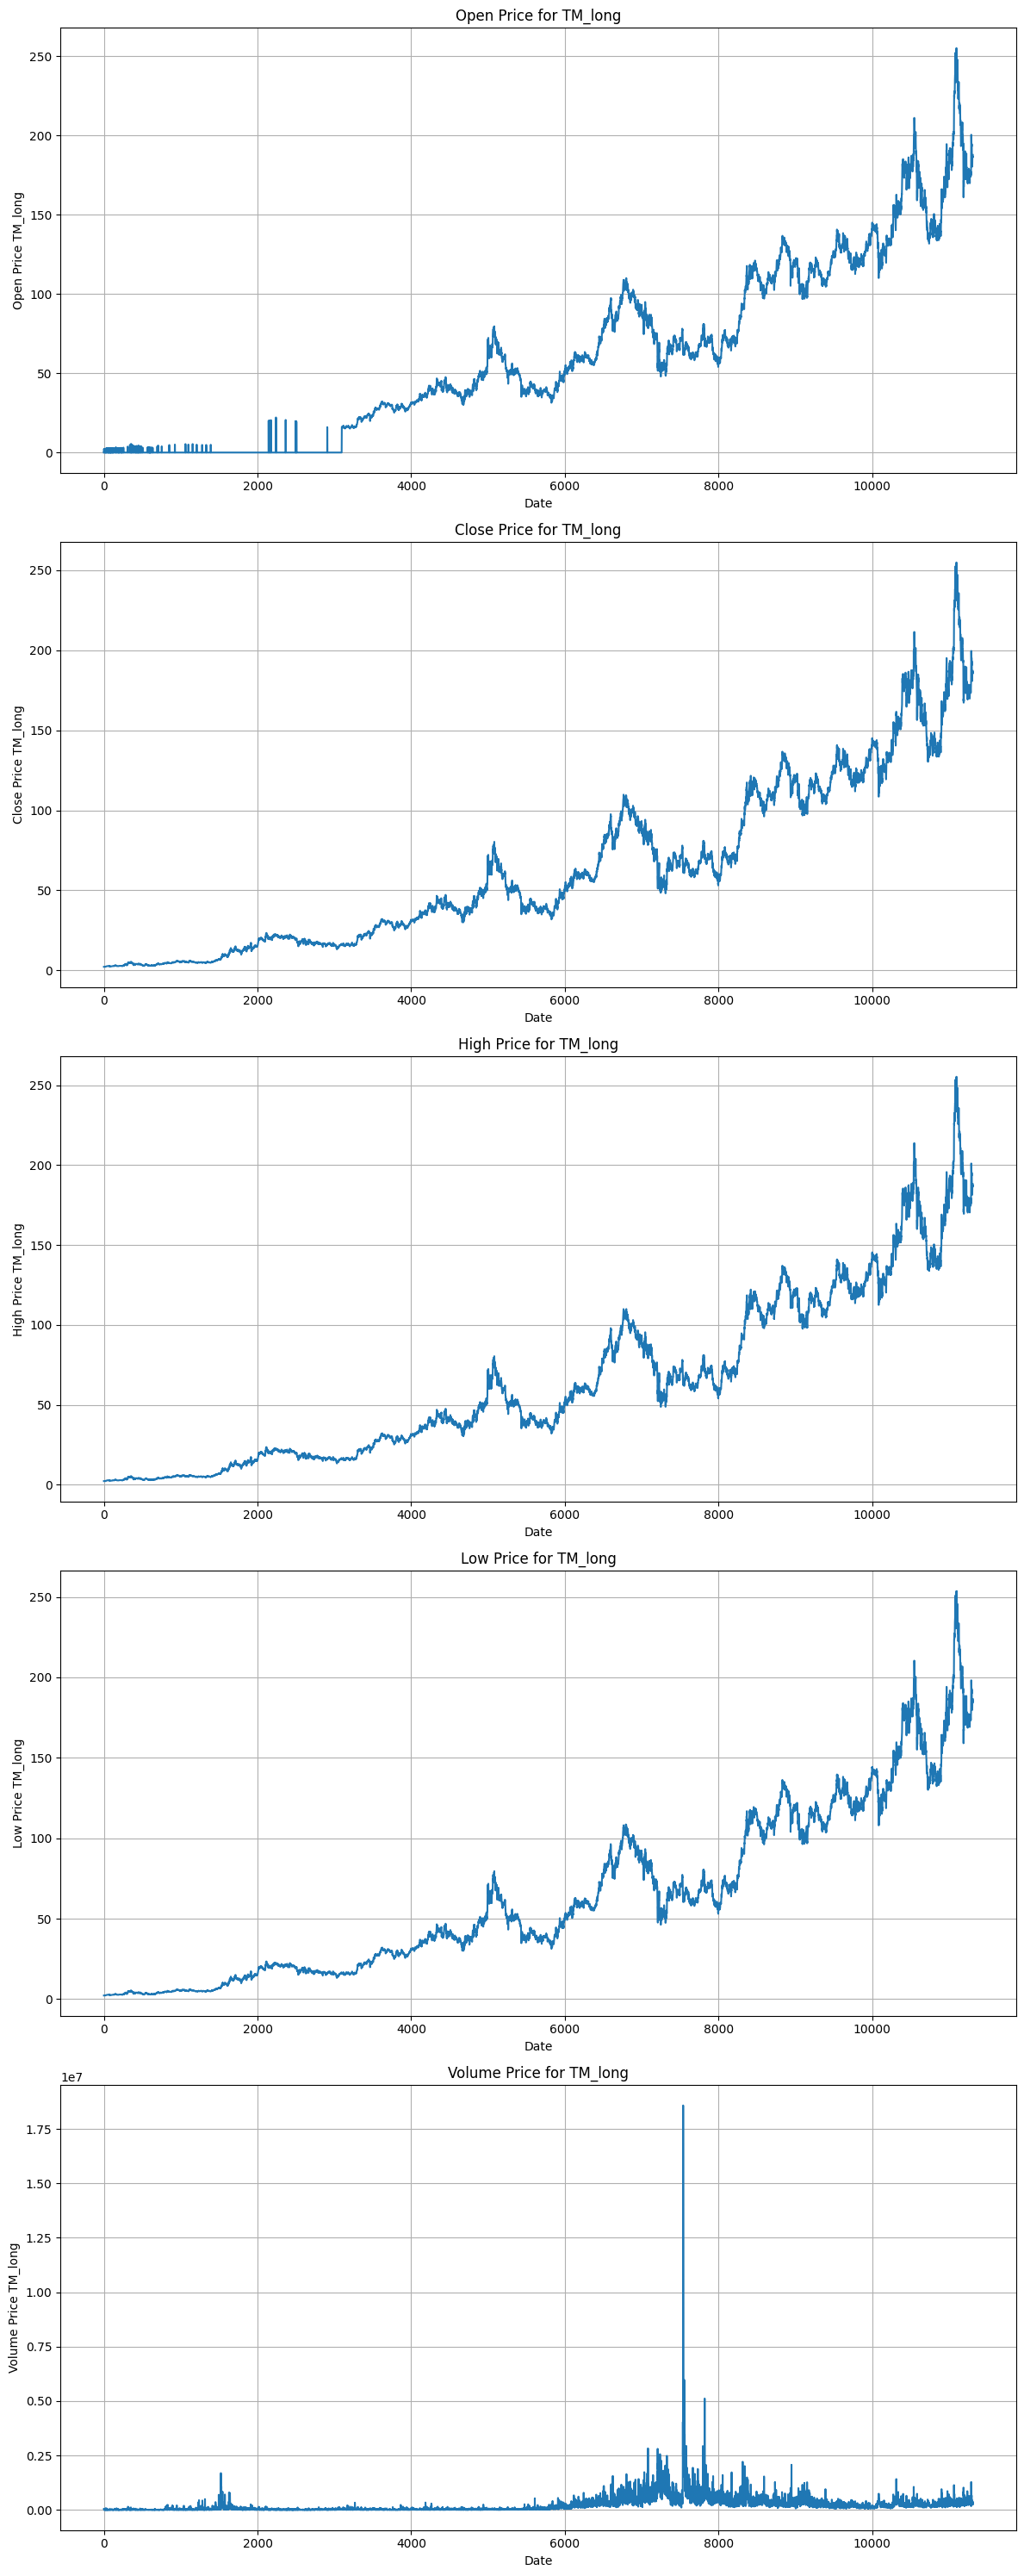

In [13]:
# List of columns to plot
columns = ['Open', 'Close', 'High', 'Low', 'Volume']

# Create subplots
fig, axes = plt.subplots(len(columns), 1, figsize=(12, 6 * len(columns)))

# Loop through each column and plot
for i, col in enumerate(columns):
    axes[i].plot(tm_long_data.index, tm_long_data[col])
    axes[i].set_title(f'{col} Price for TM_long')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(f'{col} Price TM_long')
    axes[i].grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

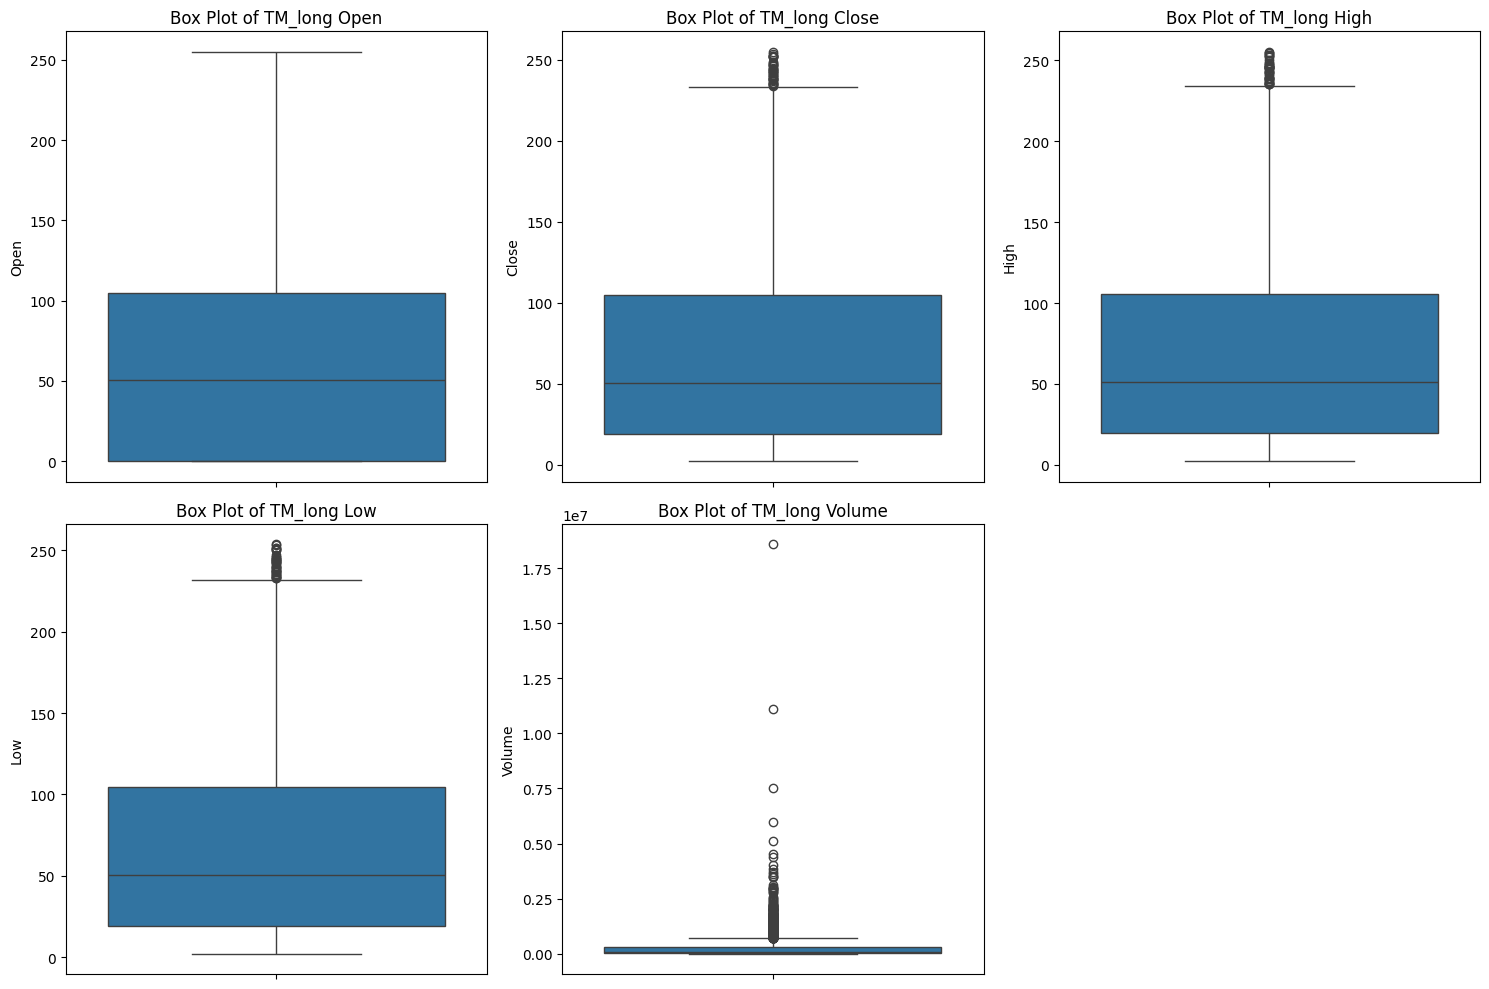

In [14]:
columns = ['Open', 'Close', 'High', 'Low', 'Volume']  # Columns to check

plt.figure(figsize=(15, 10))  # Adjust figure size as needed

for i, col in enumerate(columns):
    plt.subplot(2, 3, i + 1)  # Create subplots for each column
    sns.boxplot(y=tm_long_data[col])
    plt.title(f'Box Plot of TM_long {col}')

plt.tight_layout()
plt.show()

## Bivariate Analysis

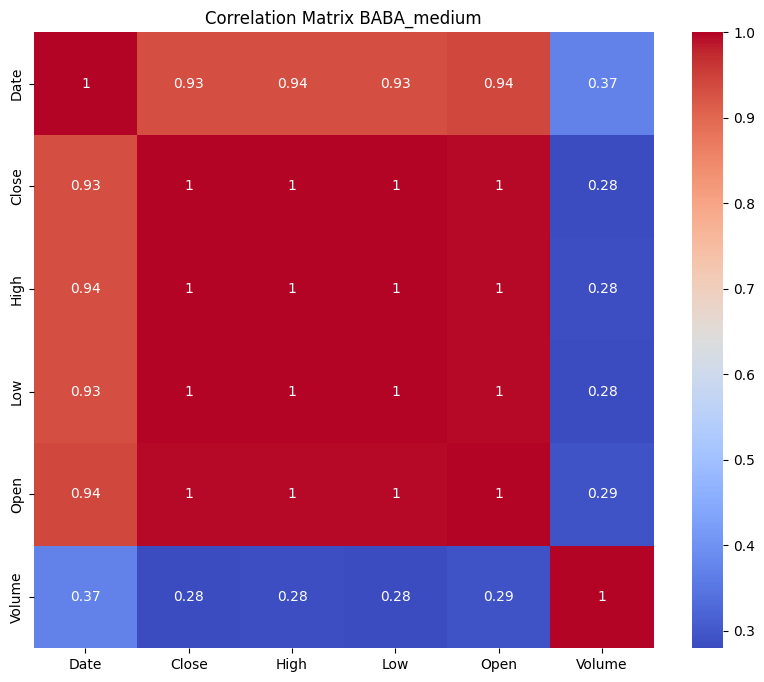

In [15]:
correlation_matrix = tm_long_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix BABA_medium')
plt.show()

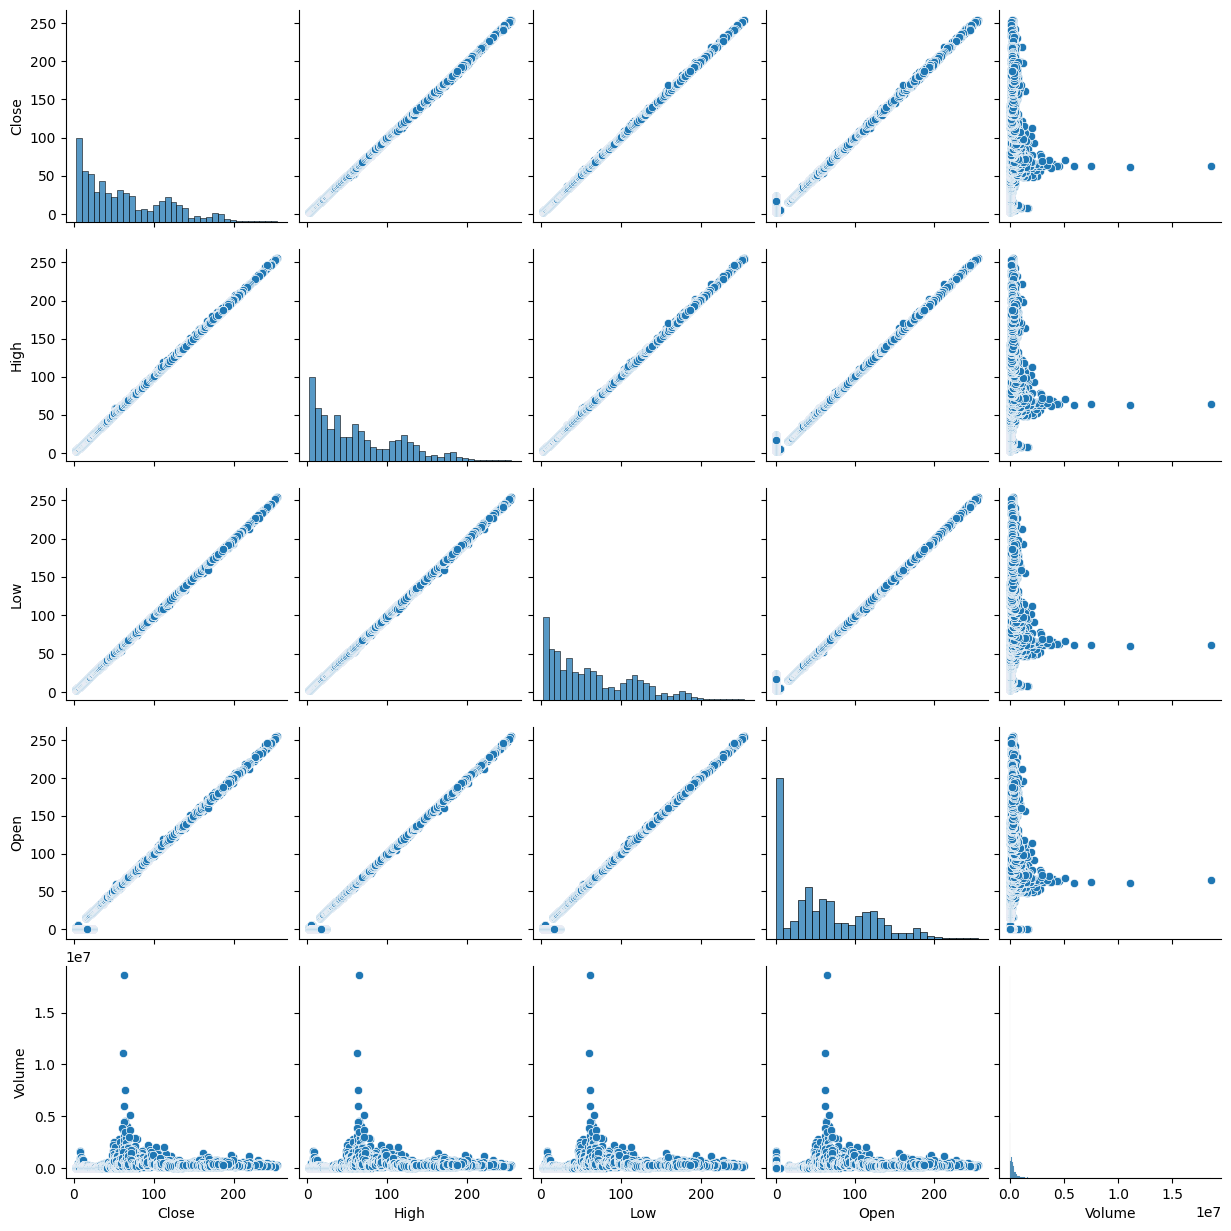

In [16]:
# pairs of numerical columns
sns.pairplot(tm_long_data.select_dtypes(include=np.number))
plt.show()

Text(0.5, 1.0, 'TM_long Relationship between Close Price and Trading Volume')

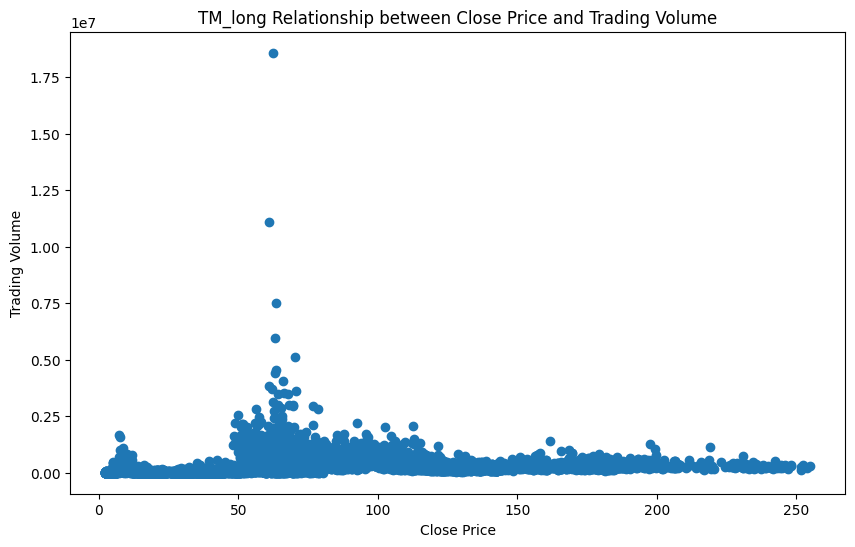

In [17]:
# relationship between price and trading volume
plt.figure(figsize=(10, 6))
plt.scatter(tm_long_data['Close'], tm_long_data['Volume'])
plt.xlabel('Close Price')
plt.ylabel('Trading Volume')
plt.title('TM_long Relationship between Close Price and Trading Volume')

# Feature Engineering

In [18]:
# Moving Average (SMA) with a 365-day window
window_sma = 365
tm_long_data['SMA'] = tm_long_data['Close'].rolling(window=window_sma).mean()

# Bollinger Bands with a 365-day window
tm_long_data['StdDev'] = tm_long_data['Close'].rolling(window=window_sma).std()
tm_long_data['UpperBand'] = tm_long_data['SMA'] + (2 * tm_long_data['StdDev'])
tm_long_data['LowerBand'] = tm_long_data['SMA'] - (2 * tm_long_data['StdDev'])

# RSI with a 60-day window
def calculate_rsi(data, window=60):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

tm_long_data['RSI'] = calculate_rsi(tm_long_data)

In [19]:
tm_long_data.isnull().sum()

,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0
SMA,364
StdDev,364
UpperBand,364
LowerBand,364


In [21]:
# FILL NA with mean
tm_long_data.fillna(tm_long_data.mean(), inplace=True)

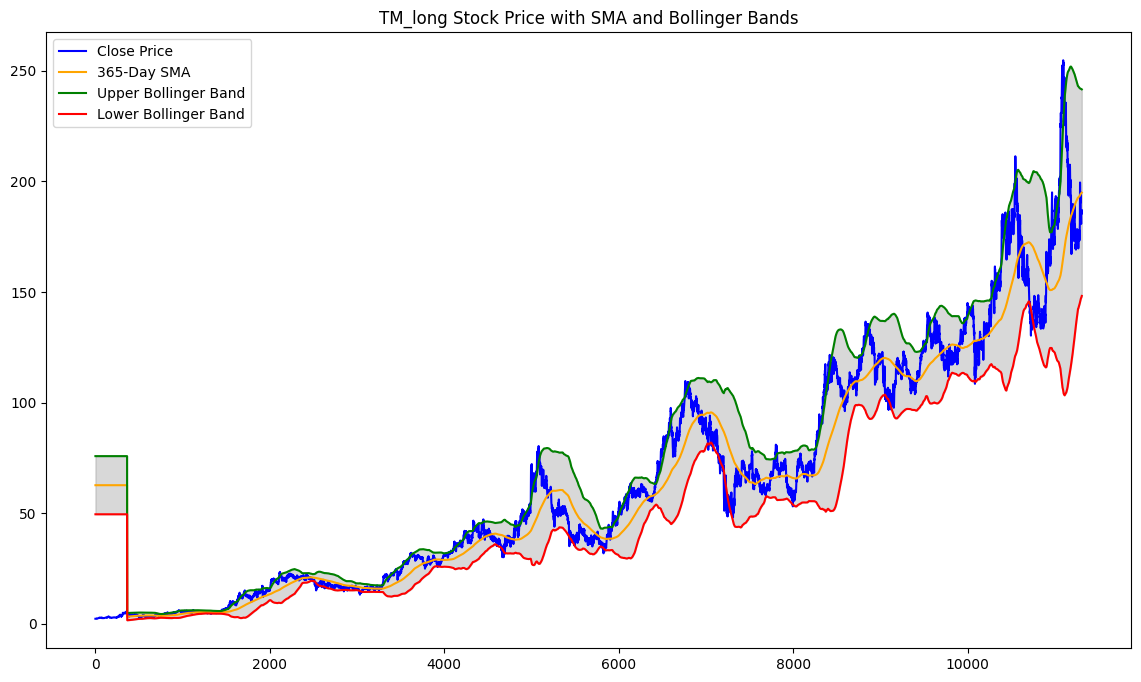

In [22]:
# Plot Close Price, SMA, and Bollinger Bands
plt.figure(figsize=(14, 8))
plt.plot(tm_long_data['Close'], label='Close Price', color='blue')
plt.plot(tm_long_data['SMA'], label=f'{window_sma}-Day SMA', color='orange')
plt.plot(tm_long_data['UpperBand'], label='Upper Bollinger Band', color='green')
plt.plot(tm_long_data['LowerBand'], label='Lower Bollinger Band', color='red')
plt.fill_between(tm_long_data.index, tm_long_data['UpperBand'], tm_long_data['LowerBand'], color='gray', alpha=0.3)
plt.title('TM_long Stock Price with SMA and Bollinger Bands')
plt.legend()
plt.show()

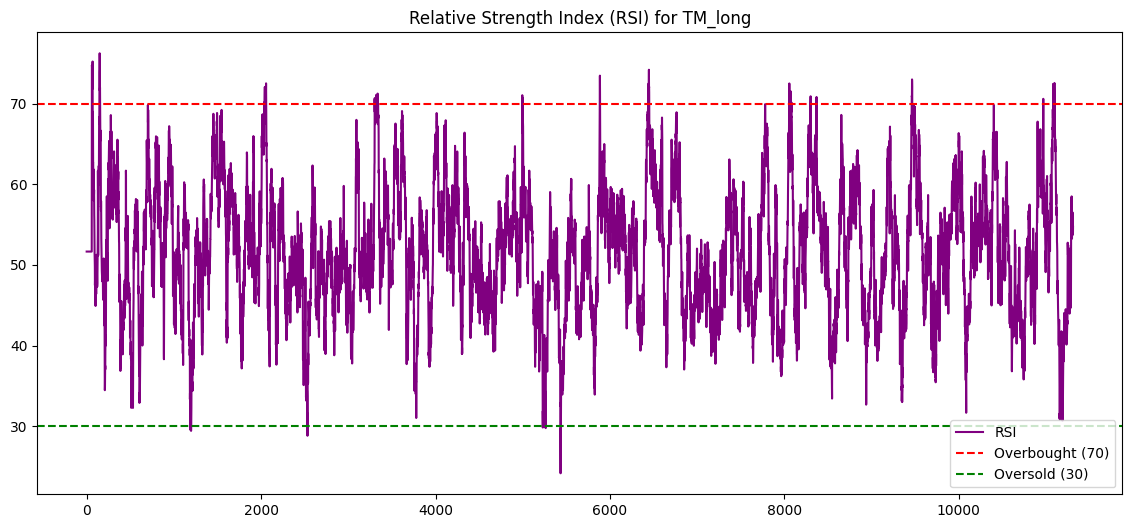

In [23]:
# Plot RSI
plt.figure(figsize=(14, 6))
plt.plot(tm_long_data['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', color='red', label='Overbought (70)')
plt.axhline(30, linestyle='--', color='green', label='Oversold (30)')
plt.title('Relative Strength Index (RSI) for TM_long')
plt.legend()
plt.show()

In [24]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 5.7 MB/s eta 0:00:00


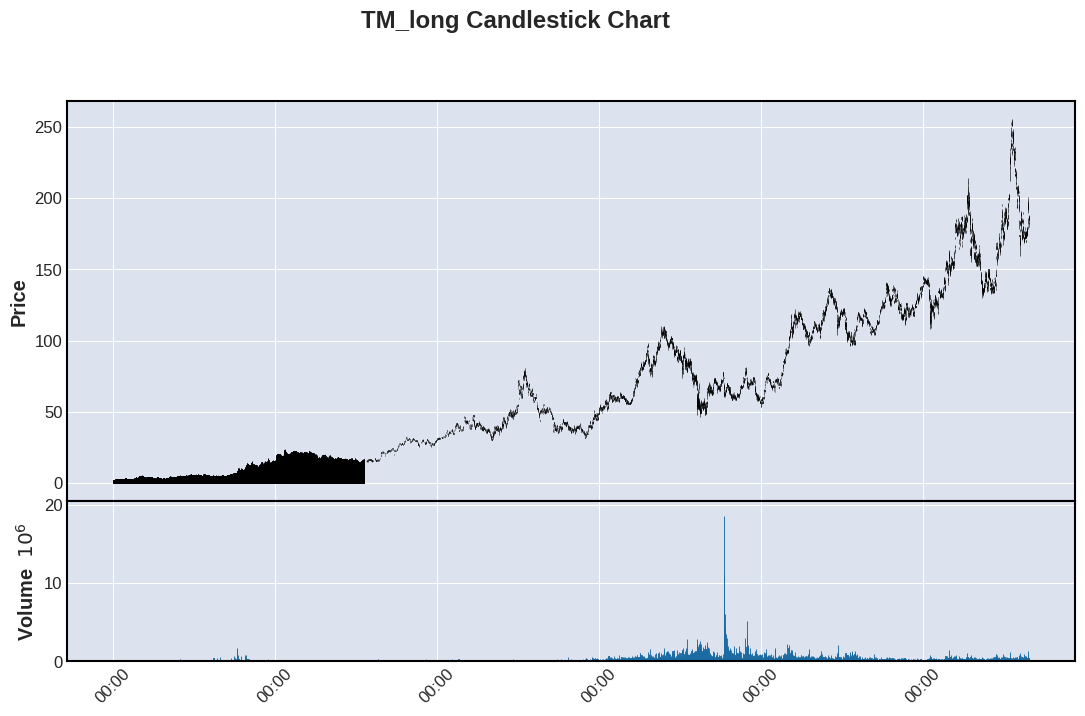

In [25]:
import mplfinance as mpf

# Ensure the index is a datetime object
tm_long_data.index = pd.to_datetime(tm_long_data.index)

# Plot candlestick chart
mpf.plot(tm_long_data, type='candle', volume=True, figsize=(14, 8),
         title='TM_long Candlestick Chart')

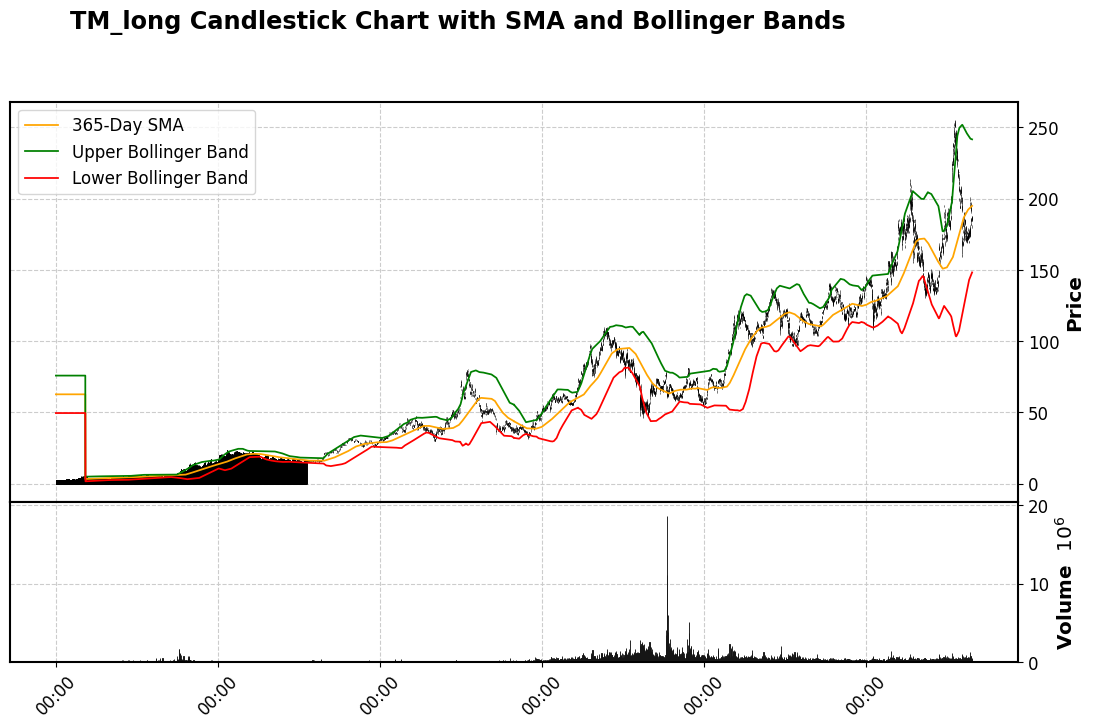

In [26]:
ap = [
    mpf.make_addplot(tm_long_data['SMA'], color='orange', label=f'{window_sma}-Day SMA'),
    mpf.make_addplot(tm_long_data['UpperBand'], color='green', label='Upper Bollinger Band'),
    mpf.make_addplot(tm_long_data['LowerBand'], color='red', label='Lower Bollinger Band')
]

# Plot candlestick chart with SMA and Bollinger Bands
mpf.plot(
    tm_long_data,
    type='candle',
    volume=True,
    addplot=ap,
    figsize=(14, 8),
    title='TM_long Candlestick Chart with SMA and Bollinger Bands',
    style='classic'  # You can change the style (e.g., 'classic', 'yahoo', 'charles')
)

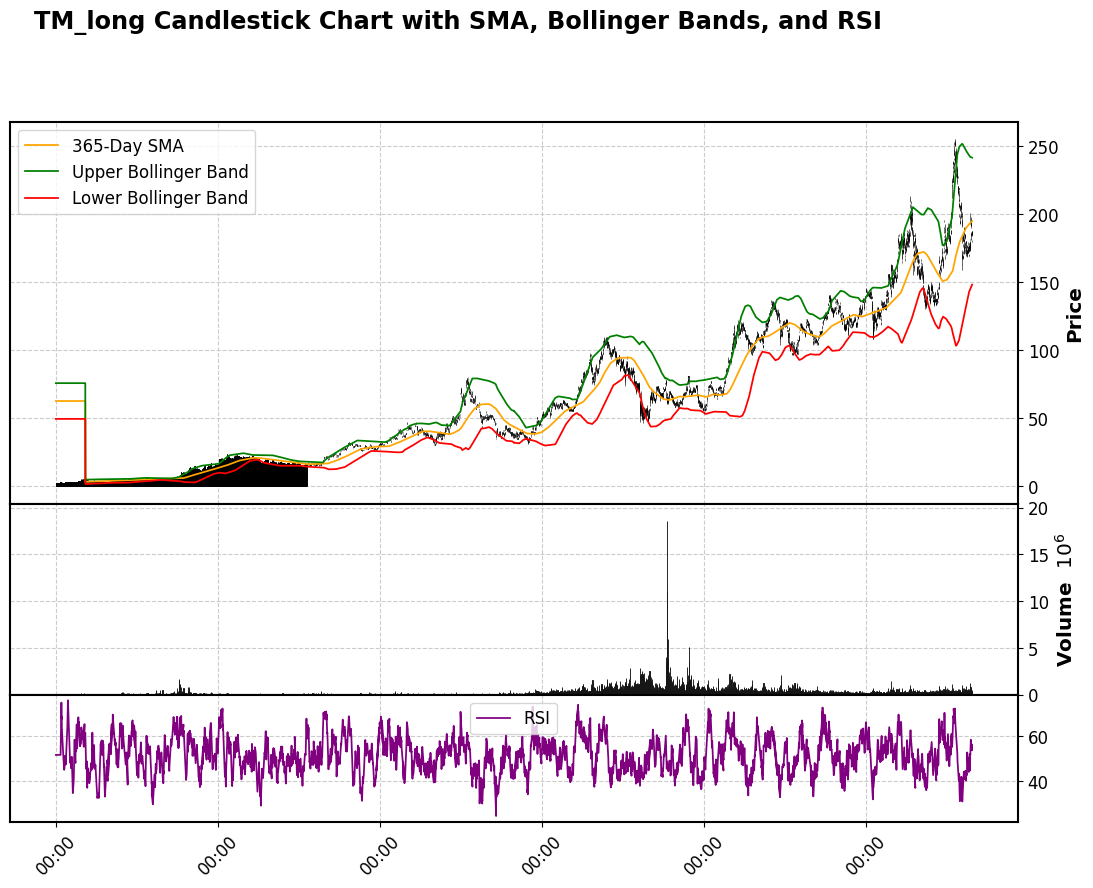

In [27]:
ap = [
    mpf.make_addplot(tm_long_data['SMA'], color='orange', label=f'{window_sma}-Day SMA'),
    mpf.make_addplot(tm_long_data['UpperBand'], color='green', label='Upper Bollinger Band'),
    mpf.make_addplot(tm_long_data['LowerBand'], color='red', label='Lower Bollinger Band'),
    mpf.make_addplot(tm_long_data['RSI'], panel=2, color='purple', label='RSI')  # RSI in a separate panel
]

# Plot candlestick chart with SMA, Bollinger Bands, and RSI
mpf.plot(
    tm_long_data,
    type='candle',
    volume=True,
    addplot=ap,
    figsize=(14, 10),
    title='TM_long Candlestick Chart with SMA, Bollinger Bands, and RSI',
    style='classic',
    panel_ratios=(6, 3, 2)  # Adjust panel ratios for main chart, RSI, and volume
)

## Time Series Decomposition

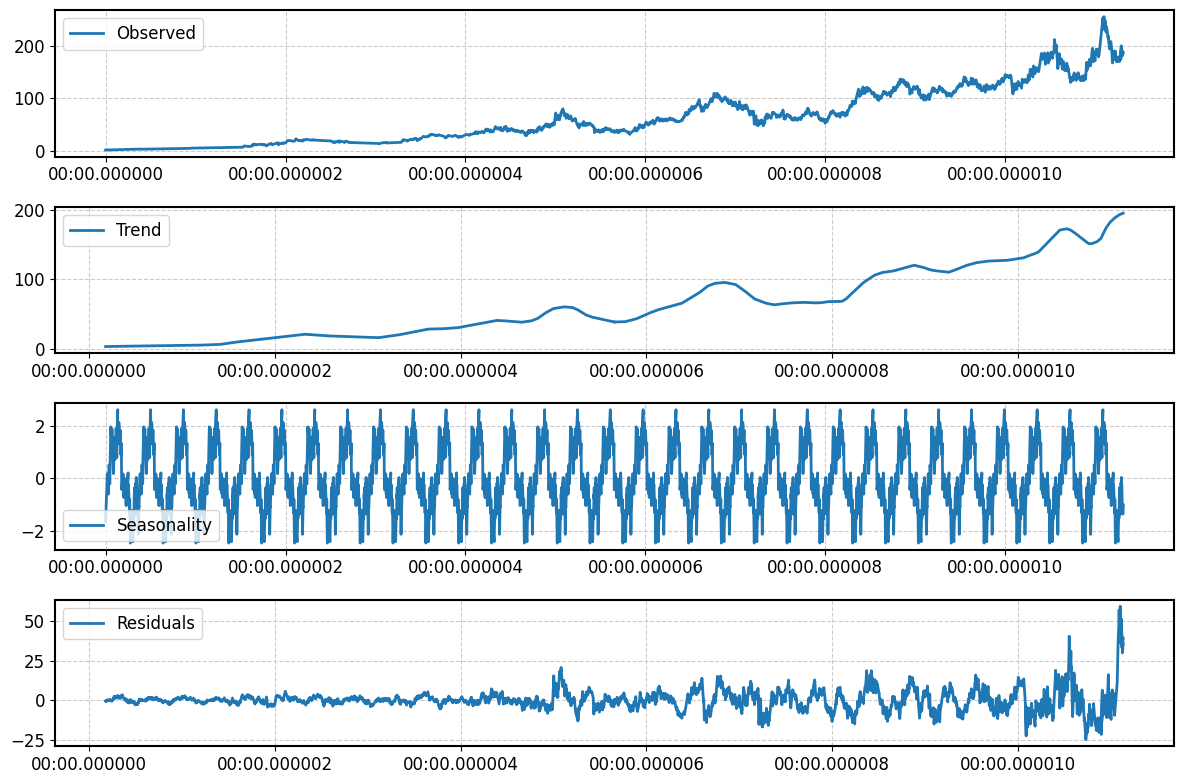

In [28]:
# Decompose the time series into trend, seasonality, and residual
decomposition = seasonal_decompose(tm_long_data['Close'], model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Daily Returns & Volatility

Historical Volatility (Standard Deviation of Daily Returns): 1.83%


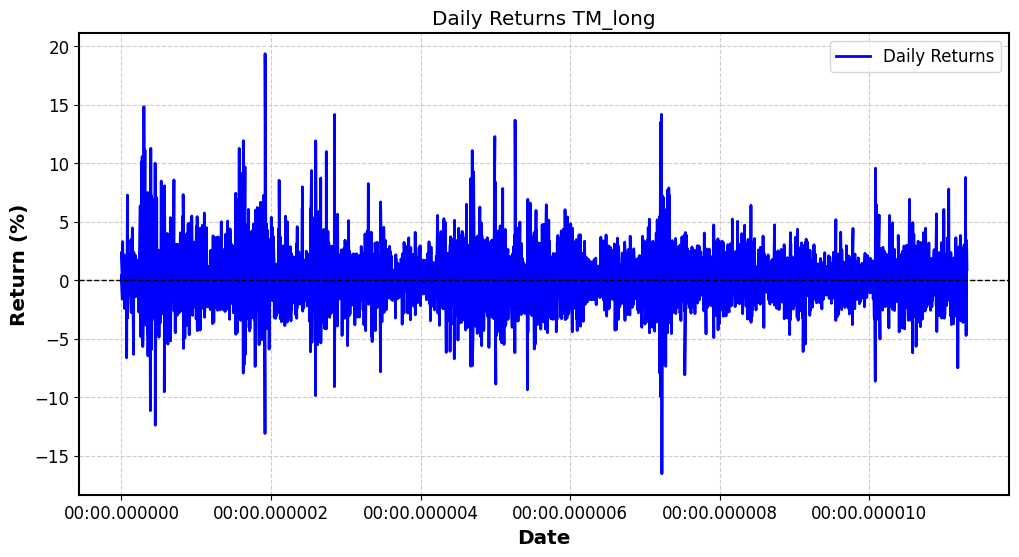

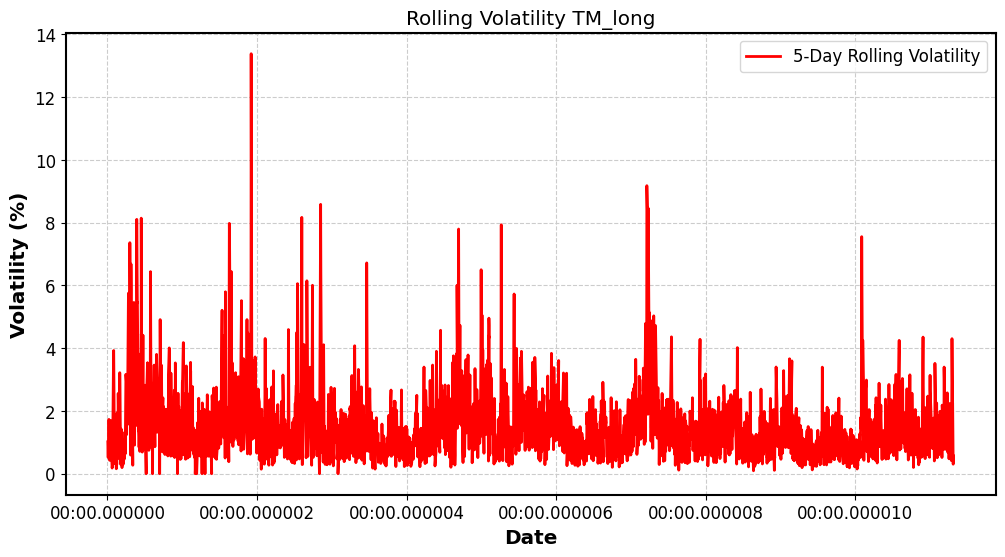

In [29]:
# Calculate daily returns
tm_long_data['Daily_Return'] = tm_long_data['Close'].pct_change() * 100  # Percentage change

# Calculate historical volatility (standard deviation of daily returns)
historical_volatility = tm_long_data['Daily_Return'].std()

# Print historical volatility
print(f"Historical Volatility (Standard Deviation of Daily Returns): {historical_volatility:.2f}%")

# Plot daily returns
plt.figure(figsize=(12, 6))
plt.plot(tm_long_data['Daily_Return'], label='Daily Returns', color='blue')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Daily Returns TM_long')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.legend()
plt.show()

# Calculate rolling volatility (e.g., 5-day rolling standard deviation)
rolling_window = 5  # Adjust the window size as needed
tm_long_data['Rolling_Volatility'] = tm_long_data['Daily_Return'].rolling(window=rolling_window).std()

# Plot rolling volatility
plt.figure(figsize=(12, 6))
plt.plot(tm_long_data['Rolling_Volatility'], label=f'{rolling_window}-Day Rolling Volatility', color='red')
plt.title('Rolling Volatility TM_long')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.show()

In [30]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(tm_long_data['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Interpret the result
if result[1] <= 0.05:
    print("The data is stationary (reject the null hypothesis).")
else:
    print("The data is non-stationary (fail to reject the null hypothesis).")

ADF Statistic: -0.2471864067857939
p-value: 0.932658392874758
Critical Values:
   1%: -3.4309303717893864
   5%: -2.8617964929904978
   10%: -2.5669065261087654
The data is non-stationary (fail to reject the null hypothesis).


In [31]:
# Apply differencing
tm_long_data['Close_diff'] = tm_long_data['Close'].diff().dropna()

In [32]:
tm_long_data.isna().sum()

,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0
SMA,0
StdDev,0
UpperBand,0
LowerBand,0


In [33]:
# drop na
tm_long_data.dropna(inplace=True)

In [34]:
# Recheck stationarity using ADF test
result = adfuller(tm_long_data['Close_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] <= 0.05:
    print("The differenced data is stationary.")
else:
    print("The differenced data is still non-stationary.")

ADF Statistic: -16.0733828600784
p-value: 5.476143289447106e-29
The differenced data is stationary.


<Figure size 1000x500 with 0 Axes>

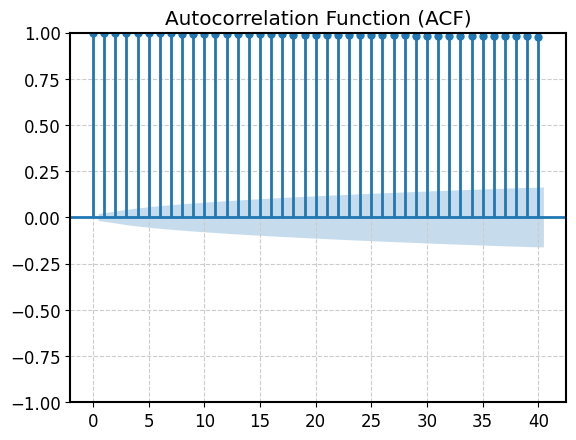

In [35]:
plt.figure(figsize=(10, 5))
plot_acf(tm_long_data['Close'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

<Figure size 1000x500 with 0 Axes>

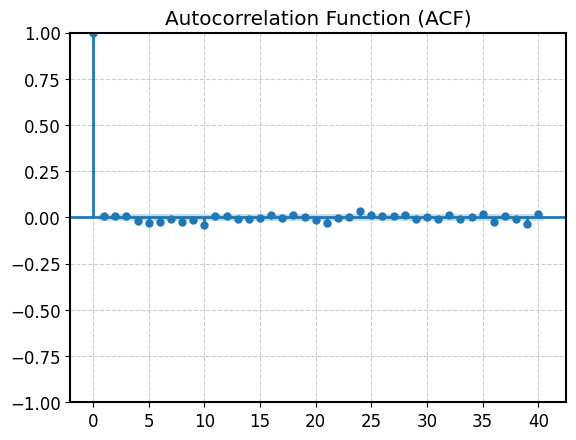

In [36]:
plt.figure(figsize=(10, 5))
plot_acf(tm_long_data['Close_diff'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# LSTM Model

In [ ]:
# get the Date out of the index
tm_long_data.reset_index(inplace=True)

In [ ]:
# isolet the Date and Sales columns
tm_long_data = tm_long_data[['Date', 'Close_diff']]

In [ ]:
tm_long_data

,Date,Close_diff
0,1981-09-01,-0.176460
1,1981-09-02,-0.107837
2,1981-09-03,0.205872
3,1981-09-04,-0.009803
4,1981-09-08,0.107836
...,...,...
10937,2025-01-23,-0.250000
10938,2025-01-24,0.339996
10939,2025-01-27,-0.110001
10940,2025-01-28,-1.210007


In [ ]:
# Split into training and testing sets based on index
train_size = int(len(tm_long_data) * 0.8)  # 80% for training
train_data = tm_long_data[:train_size]
test_data = tm_long_data[train_size:]

In [ ]:
# set the date coumn as index
train_data.set_index('Date', inplace=True)
test_data.set_index('Date', inplace=True)

In [ ]:
train_data

,Close_diff
Date,
1981-09-01,-0.176460
1981-09-02,-0.107837
1981-09-03,0.205872
1981-09-04,-0.009803
1981-09-08,0.107836
...,...
2016-05-10,2.176903
2016-05-11,-6.284447
2016-05-12,2.895958


In [ ]:
test_data

,Close_diff
Date,
2016-05-17,-0.206856
2016-05-18,0.906219
2016-05-19,-1.891243
2016-05-20,0.985023
2016-05-23,-1.044121
...,...
2025-01-23,-0.250000
2025-01-24,0.339996
2025-01-27,-0.110001


In [ ]:
# look at train data date range
train_data.index.min(), train_data.index.max()

(Timestamp('1981-09-01 00:00:00'), Timestamp('2016-05-16 00:00:00'))

In [ ]:
# look at the test data date range
test_data.index.min(), test_data.index.max()

(Timestamp('2016-05-17 00:00:00'), Timestamp('2025-01-29 00:00:00'))

In [ ]:
scaler = MinMaxScaler()

train_data.loc[:, 'x'] = scaler.fit_transform(train_data[['Close_diff']])
test_data.loc[:, 'x'] = scaler.transform(test_data[['Close_diff']])

In [ ]:
# Create sequences for the LSTM model
sequence_length = 100
train_sequences = []
test_sequences = []

for i in range(len(train_data) - sequence_length):
    train_sequences.append(train_data['x'].iloc[i:i+sequence_length].values)

for i in range(len(test_data) - sequence_length):
    test_sequences.append(test_data['x'].iloc[i:i+sequence_length].values)

train_sequences = np.array(train_sequences)
test_sequences = np.array(test_sequences)

In [ ]:
# Prepare train and test targets
train_targets = train_data['x'].iloc[sequence_length:].values
test_targets = test_data['x'].iloc[sequence_length:].values

In [ ]:
import time
start_time = time.time()

# Create and train an LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_sequences.reshape(-1, sequence_length, 1), train_targets,
epochs=5, batch_size=32)

# Make predictions
test_predictions = model.predict(
                   test_sequences.reshape(-1, sequence_length, 1))

print(time.time() - start_time)

# Inverse transform the predictions to the original scale
test_predictions = scaler.inverse_transform(test_predictions).flatten()
test_targets = scaler.inverse_transform(test_targets.reshape(-1, 1))

Epoch 1/5
271/271 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - loss: 0.0417
Epoch 2/5
271/271 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - loss: 0.0026
Epoch 3/5
271/271 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - loss: 0.0027
Epoch 4/5
271/271 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - loss: 0.0027
Epoch 5/5
271/271 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - loss: 0.0026
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
106.51675415039062


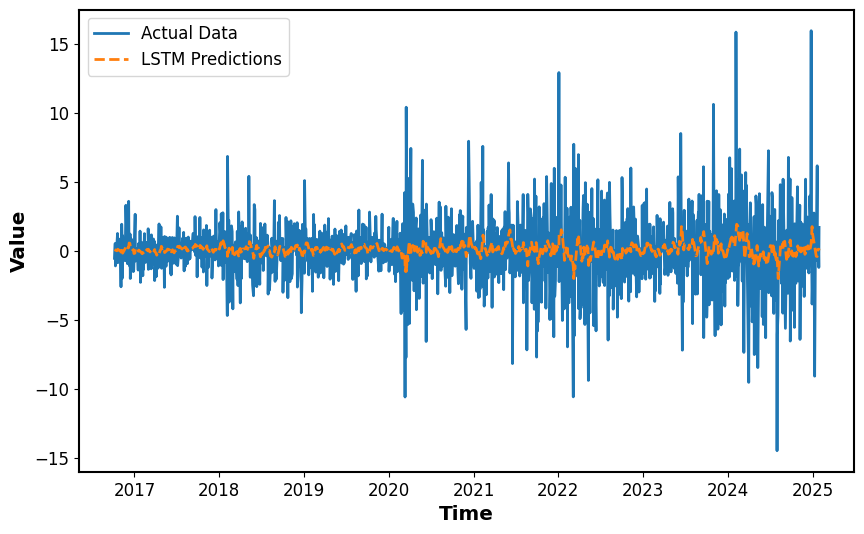

In [ ]:
# Plot the original data and LSTM predictions
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[sequence_length:], test_targets,
label="Actual Data", linestyle='-')
plt.plot(test_data.index[sequence_length:], test_predictions,
label="LSTM Predictions", linestyle='--')
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(False)
plt.show()

In [ ]:
# measure of prediction accuracy
test_predictions_df = pd.DataFrame(test_predictions, columns = ["LSTM"])
test_targets_df = pd.DataFrame(test_targets, columns = ["actuals"])
predictions = pd.concat([test_predictions_df, test_targets_df], axis=1)

wape = (predictions['actuals'] - predictions['LSTM']).abs().sum() / predictions['actuals'].sum()

print(wape * 100)

4661.981758125383


In [ ]:
# predict for the next one year
last_sequence = test_sequences[-1]
predicted_values = []

for _ in range(365):
    predicted_value = model.predict(last_sequence.reshape(1, sequence_length, 1))
    predicted_values.append(predicted_value[0, 0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = predicted_value

predicted_values = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1)).flatten()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━

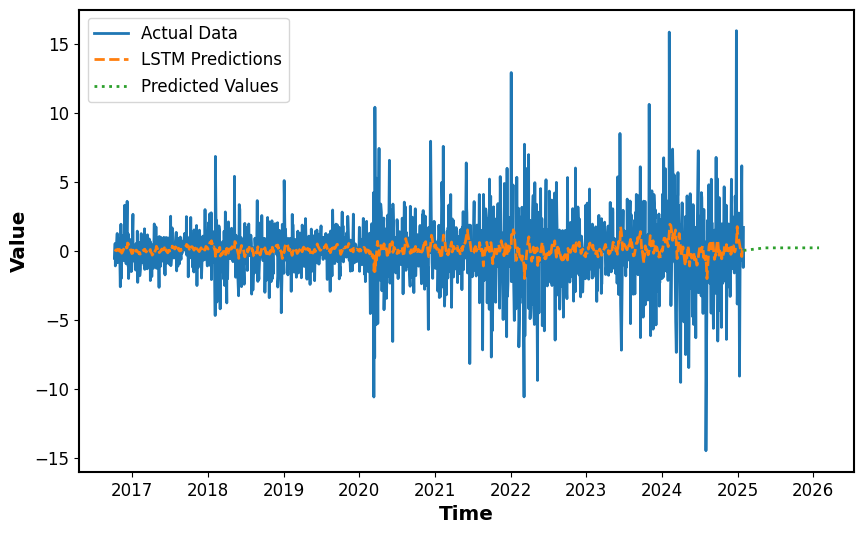

In [ ]:
# show in plot
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[sequence_length:], test_targets,
label="Actual Data", linestyle='-')
plt.plot(test_data.index[sequence_length:], test_predictions,
label="LSTM Predictions", linestyle='--')

# Generate a date range for the predicted values
# Assuming your test_data has a daily frequency
from pandas.tseries.offsets import DateOffset
future_dates = pd.date_range(start=test_data.index[-1], periods=365 + 1, freq='D')[1:]  # Exclude the start date

# Now plot the predicted values against the future dates
plt.plot(future_dates, predicted_values,
         label="Predicted Values", linestyle=':')

plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(False)
plt.show()